<a href="https://colab.research.google.com/github/Memoona028/Plant-disease-detection-ANN-Project-/blob/main/Plant_Disease_Detection_CNN_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Data source : https://www.kaggle.com/datasets/abdallahalidev/plantvillage-dataset

We use the PlantVillage dataset which consists of about 54305 healthy and unhealthy leaf images divided into 38 categories by species and disease.We use simpel image classification **CNN** architecture which consistes of 17 layers (in which thereare three fully connected three layer)

#### Classes

->  The following 38 classes are availaible in the dataset

- `Apple___Apple_scab`
- `Apple___Black_rot`
- `Apple___Cedar_apple_rust`
- `Apple___healthy`
- `Blueberry___healthy`
- `Cherry_(including_sour)___Powdery_mildew`
- `Cherry_(including_sour)___healthy`
- `Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot`
- `Corn_(maize)___Common_rust_`
- `Corn_(maize)___Northern_Leaf_Blight`
- `Corn_(maize)___healthy', 'Grape___Black_rot`
- `Grape___Leaf_blight_(Isariopsis_Leaf_Spot)`
- `Grape___healthy`
- `Orange___Haunglongbing_(Citrus_greening)`
- `Peach___Bacterial_spot`
- `Peach___healthy`
- `Pepper,_bell___Bacterial_spot`
- `Pepper,_bell___healthy`
- `Potato___Early_blight`
- `Potato___Late_blight`
- `Potato___healthy`
- `Raspberry___healthy`
- `Soybean___healthy`
- `Squash___Powdery_mildew`
- `Strawberry___Leaf_scorch`
- `Strawberry___healthy`
- `Tomato___Bacterial_spot`
- `Tomato___Late_blight`
- `Tomato___Leaf_Mold`
- `Tomato___Septoria_leaf_spot`
- `Tomato___Spider_mites Two-spotted_spider_mite`
- `Tomato___Target_Spot`
- `Tomato___Tomato_Yellow_Leaf_Curl_Virus`
- `Tomato___Tomato_mosaic_virus`
- `Tomato___healthy`

## Importing dependencies



In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.exceptions import UndefinedMetricWarning
import numpy as np
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf
from tensorflow import keras
import os
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import warnings
# Use tf.compat.v1.ragged.RaggedTensorValue instead of tf.ragged.RaggedTensorValue
# and tf.compat.v1.executing_eagerly_outside_functions instead of tf.executing_eagerly_outside_functions

## Loading and Preprocessing Data

This block loads and preprocess the dataset using the `image_dataset_from_directory` function from TensorFlow/Keras.

### Parameters:
- `path`: The path to the directory containing the dataset.
- `image_size`: The dimensions to which all input images are resized.
- `batch_size`: The number of samples per batch during training.
- `seed`: The seed for the random number generator for reproducibility.
- `validation_split`: The proportion of the dataset used for validation.
- `subset`: Specifies to use both the training and validation subsets.


In [ ]:
path = r'C:\Users\DELL\Downloads\plantvillage dataset\color'
train_ds , test_ds = keras.utils.image_dataset_from_directory(
    path ,
    image_size=(224,224),
    batch_size=32 ,
    seed = 123 ,
    validation_split=.2,
    subset='both'
)

Found 54305 files belonging to 38 classes.
Using 43444 files for training.
Using 10861 files for validation.


## Extracting Class Names
- `test_classes` extracted from test dataset and the main classes indicate our training classes

- After creating the `train_ds` dataset, we can extract the list of class names using the `class_names` attribute.

In [ ]:
classes = train_ds.class_names
test_classes = test_ds.class_names

## Visualizing Images

- In this step we will now visualize some example images from the dataset. The image is loaded using OpenCV (`cv2.imread`), and then displayed using Matplotlib (`plt.imshow`).

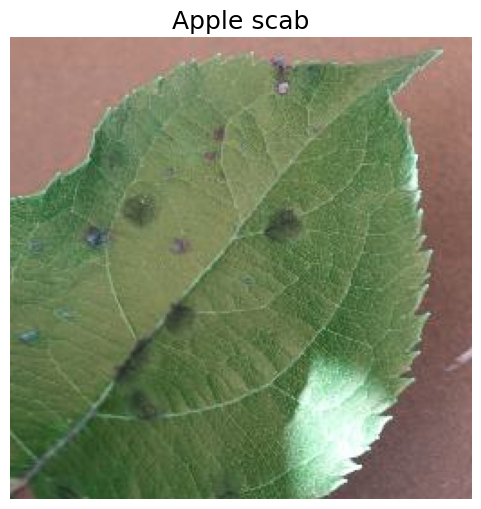

In [ ]:
image = cv2.imread(r'C:\Users\DELL\Downloads\plantvillage dataset\color\01f3deaa-6143-4b6c-9c22-620a46d8be04___FREC_Scab 3112.JPG')
plt.figure(figsize = (6,6))
plt.imshow(image)
plt.title('Apple scab',size =18 )
plt.axis('off')
plt.show()

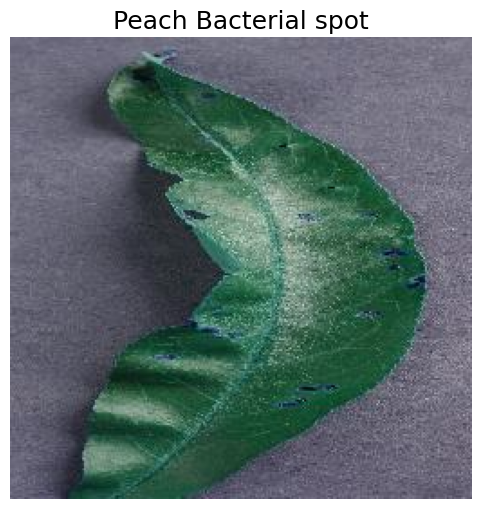

In [ ]:
image = cv2.imread(r'C:\Users\DELL\Downloads\plantvillage dataset\color\00e6ad4a-5a62-48d7-ac68-9c0b8ec87f5f___Rut._Bact.S 1472.JPG')
plt.figure(figsize = (6,6))
plt.imshow(image)
plt.title('Peach Bacterial spot',size =18 )
plt.axis('off')
plt.show()

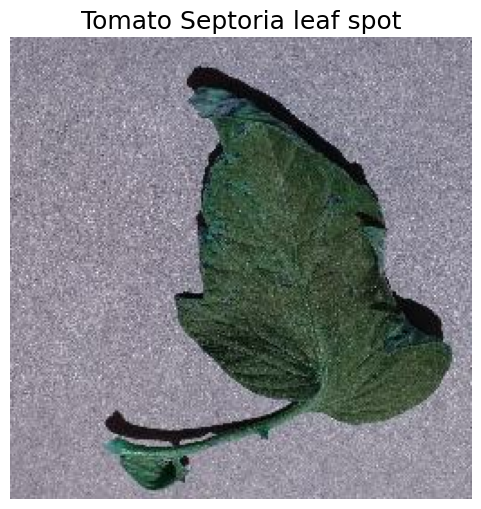

In [ ]:
image = cv2.imread(r'C:\Users\DELL\Downloads\plantvillage dataset\color\Tomato___Septoria_leaf_spot/015c2613-fb1c-4f31-88f1-c7e5be9ddc97___JR_Sept.L.S 8431.JPG')
plt.figure(figsize = (6,6))
plt.imshow(image)
plt.title('Tomato Septoria leaf spot',size =18 )
plt.axis('off')
plt.show()

## Building Neural Network CNN
-  This CNN model has a total of 14 layers, including convolutional, max-pooling, dropout, flatten, and dense layers, designed to extract hierarchical features from input images and classify them into one or more of 38 possible categories

- Define the architecture of Convolutional Neural Network (CNN) using TensorFlow/Keras. The CNN is designed for image classification, and the following layers are incorporated:


In [ ]:
# Use tf.compat.v1.get_default_graph() instead of tf.get_default_graph()
# Use tf.nn.max_pool2d instead of tf.nn.max_pool
model = keras.Sequential([
    keras.layers.Rescaling(scale = 1/255 , input_shape =(224,224,3) ) ,

    keras.layers.Conv2D(32 , (3,3) , activation = 'relu'),
    keras.layers.MaxPool2D((2,2))                     ,
    keras.layers.Dropout(0.2),

    keras.layers.Conv2D(64 , (3,3) , activation = 'relu') ,
    keras.layers.MaxPool2D((2,2)) ,
    keras.layers.Dropout(0.2),

    keras.layers.Conv2D(64 , (3,3) , activation = 'relu') ,
    keras.layers.MaxPool2D((2,2)) ,
    keras.layers.Dropout(0.2),

    keras.layers.Conv2D(64 , (3,3) , activation = 'relu') ,
    keras.layers.MaxPool2D((2,2)) ,
    keras.layers.Dropout(0.2),

    keras.layers.Conv2D(128 , (3,3) , activation = 'relu') ,
    keras.layers.MaxPool2D((2,2)) ,

    # fully connected layers

    keras.layers.Flatten(),
    keras.layers.Dense(128,activation = 'relu'),
    keras.layers.Dense(64,activation = 'relu'),
    keras.layers.Dense(38,activation ='sigmoid')

])

# Compiling our Model

- After defining the architecture of the Convolutional Neural Network (CNN), the next step is to compile the model. This involves specifying the "optimizer", "loss function", and "metrics" for training.


In [ ]:
model.compile(
    optimizer = 'adam' ,
    loss = 'sparse_categorical_crossentropy',
    metrics = 'accuracy'
)

## Summary of the Model

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 224, 224, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 111, 111, 32)      0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 111, 111, 32)      0         
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 54, 54, 64)        0         
 g2D)                                                   

## Training the Model
- An epoch refers to one complete pass of the entire dataset through the neural network during the training processIn our case we set it to 20.
- This step involves the training of our model it on the training dataset. The `fit` method is used for this purpose.

In [ ]:
my_model = model.fit(train_ds, epochs=20, batch_size=32)

Epoch 1/20
1358/1358 [==============================] - 2446s 2s/step - loss: 1.3912 - accuracy: 0.5992
Epoch 2/20
1358/1358 [==============================] - 1982s 1s/step - loss: 0.5709 - accuracy: 0.8194
Epoch 3/20
1358/1358 [==============================] - 1721s 1s/step - loss: 0.3805 - accuracy: 0.8769
Epoch 4/20
1358/1358 [==============================] - 2207s 2s/step - loss: 0.3072 - accuracy: 0.9009
Epoch 5/20
1358/1358 [==============================] - 50992s 38s/step - loss: 0.2396 - accuracy: 0.9209
Epoch 6/20
1358/1358 [==============================] - 4325s 3s/step - loss: 0.2049 - accuracy: 0.9313
Epoch 7/20
1358/1358 [==============================] - 8505s 6s/step - loss: 0.1826 - accuracy: 0.9399
Epoch 8/20
1358/1358 [==============================] - 2853s 2s/step - loss: 0.1621 - accuracy: 0.9461
Epoch 9/20
1358/1358 [==============================] - 3513s 3s/step - loss: 0.1489 - accuracy: 0.9498
Epoch 10/20
1358/1358 [==============================] - 2951s

## Visualizing Training Accuracy and Loss

In the previous code cell, we trained our plant disease detection model for 20 epochs.
Now, let's visualize how the model performed during training by plotting the training accuracy and loss over epochs.

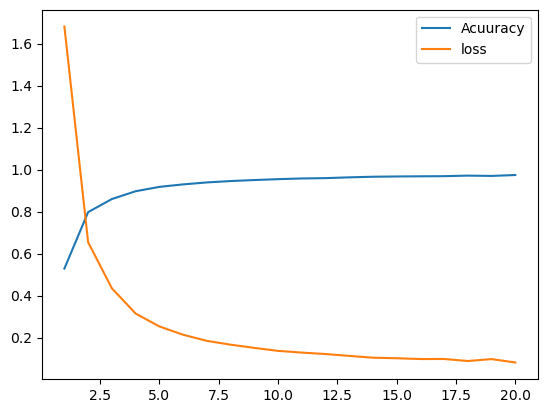

In [ ]:
accuracy = my_model.my_model['accuracy']
loss = my_model.my_model['loss']
epochs = range(1,21)

plt.plot(epochs , accuracy , label = 'Acuuracy')
plt.plot(epochs , loss , label = 'loss')
plt.legend()
plt.show()

### Evaluating Model Performance on Test Dataset

 After training our plant disease detection model, it's important to assess its performance on an independent dataset.
 We use the `evaluate` method to quantify how well the model generalizes to new, unseen data.

`test_ds` is the test dataset containing images and corresponding labels that the model has not seen during training.
 The evaluation process computes metrics such as accuracy and loss on the test dataset.

In [ ]:
model.evaluate(test_ds)

340/340 [==============================] - 92s 266ms/step - loss: 0.3605 - accuracy: 0.9025


[0.36048489809036255, 0.9024951457977295]

## Now saving the model

In [ ]:
model.save(r'C:\Users\DELL\Downloads\plant_models\my_model.h5')

NameError: name 'model' is not defined

# Conclusion
- The plant leaf disease detection system employing a Convolutional Neural Network (CNN) model achieved promising results. After training the model over 20 epochs, it attained an impressive training accuracy of approximately **97.11%**. This high accuracy on the training set indicates that the model effectively learned to distinguish between different classes of plant leaf diseases based on the provided images.

- Upon testing the trained model, it demonstrated a satisfactory accuracy of approximately **90.25%**. This indicates that the model generalized well to unseen data, performing effectively in identifying plant leaf diseases in images it had not encountered during training.

In [ ]:
!pip install tf-explain


  Obtaining dependency information for tf-explain from https://files.pythonhosted.org/packages/43/75/4611078380c5f5933b71378be6733e43f10667b4ca15de6e09e12a2d8025/tf_explain-0.3.1-py3-none-any.whl.metadata
   ---------------------------------------- 0.0/43.6 kB ? eta -:--:--
   ---------------------------------------- 43.6/43.6 kB 2.2 MB/s eta 0:00:00
